<a href="https://colab.research.google.com/github/satml/Data-Visualization-Using-Python-Pandas-matlibplot/blob/master/data_visualization_international_students_in_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#!pip install xlrd

In [0]:
#https://p.widencdn.net/bmzd7h/International-Students-Places-of-Origin
rows_to_skip = list(range(4)) # 0.1,2,3
rows_to_skip.append(5) #5

df_is = pd.read_excel('https://p.widencdn.net/bmzd7h/International-Students-Places-of-Origin',
                       sheet_name='1',
                       skiprows=rows_to_skip,
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [0]:
df_is.head()

,Rank,Place of Origin,2017/18,2018/19,% of Total,Change
0,1,China,363341,369548,33.7,1.7
1,2,India,196271,202014,18.4,2.9
2,3,South Korea,54555,52250,4.8,-4.2
3,4,Saudi Arabia,44432,37080,3.4,-16.5
4,5,Canada,25909,26122,2.4,0.8


In [0]:
#When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the info() method.
df_is.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             23 non-null     int64  
 1   Place of Origin  23 non-null     object 
 2   2017/18          23 non-null     int64  
 3   2018/19          23 non-null     int64  
 4   % of Total       23 non-null     float64
 5   Change           23 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ KB


In [0]:
#To get the list of column headers we can call upon the dataframe's .columns parameter
df_is.columns.values

array(['Rank', 'Place of Origin', '2017/18', '2018/19', '% of Total',
       'Change'], dtype=object)

In [0]:
#Similarly, to get the list of indicies we use the .index parameter.
df_is.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [0]:
print(type(df_is.columns))
print(type(df_is.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [0]:
#To get the index and columns as lists, we can use the tolist() method.
df_is.columns.tolist()
df_is.index.tolist()

print (type(df_is.columns.tolist()))
print (type(df_is.index.tolist()))

<class 'list'>
<class 'list'>


In [0]:
# Dimension
# size of dataframe (rows, columns)
df_is.shape    

(23, 6)

In [0]:
#Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:

# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_is.drop(['Rank'], axis=1, inplace=True)
df_is.head(2)

,Place of Origin,2017/18,2018/19,% of Total,Change
0,China,363341,369548,33.7,1.7
1,India,196271,202014,18.4,2.9


In [0]:
#Let's rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names as follows
df_is.rename(columns={'Place of Origin':'Country of Origin' }, inplace=True)
df_is.columns

Index(['Country of Origin', '2017/18', '2018/19', '% of Total', 'Change'], dtype='object')

In [0]:
#We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:
df_is['Total'] = df_is.sum(axis=1)

In [0]:
#We can check to see how many null objects we have in the dataset as follows:
df_is.isnull().sum()


Country of Origin    0
2017/18              0
2018/19              0
% of Total           0
Change               0
Total                0
dtype: int64

In [0]:
#Finally, let's view a quick summary of each column in our dataframe using the describe() method
df_is.describe()

,2017/18,2018/19,% of Total,Change,Total
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,39561.652174,39641.347826,3.613043,-1.086957,79205.526087
std,80737.986951,82373.809721,7.511464,6.202588,163108.957805
min,7496.000000,7760.000000,0.700000,-16.500000,15500.300000
25%,9422.000000,8953.500000,0.800000,-3.850000,18371.550000
50%,12783.000000,13229.000000,1.200000,-1.000000,26123.000000
75%,23389.500000,23880.500000,2.150000,2.300000,47274.350000
max,363341.000000,369548.000000,33.700000,10.000000,732924.400000


## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name 
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python 
    df[['column 1', 'column 2']] 
        (returns dataframe)
```
---


Example: Let's try filtering on the list of countries ('Country').

In [0]:
df_is['Country of Origin']

0              China
1              India
2        South Korea
3       Saudi Arabia
4             Canada
5            Vietnam
6             Taiwan
7              Japan
8             Brazil
9             Mexico
10           Nigeria
11             Nepal
12              Iran
13    United Kingdom
14            Turkey
15            Kuwait
16           Germany
17            France
18         Indonesia
19        Bangladesh
20          Colombia
21          Pakistan
22         Venezuela
Name: Country of Origin, dtype: object

## Select Row

There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```
Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. 

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [0]:
df_is.columns = list(map(str, df_is.columns))
[print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None, None, None, None, None, None]

Visualizing using Matplot lib

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

In [0]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.

In [0]:
df_is_p = df_is[['Country of Origin','% of Total' ]] # passing in years 1980 - 2013 to exclude the 'total' column
df_is_p.head()

,Country of Origin,% of Total
0,China,33.7
1,India,18.4
2,South Korea,4.8
3,Saudi Arabia,3.4
4,Canada,2.4


In [0]:
df_is_p.set_index('Country of Origin', inplace=True)
print(df_is_p)

                   % of Total
Country of Origin            
China                    33.7
India                    18.4
South Korea               4.8
Saudi Arabia              3.4
Canada                    2.4
Vietnam                   2.2
Taiwan                    2.1
Japan                     1.7
Brazil                    1.5
Mexico                    1.4
Nigeria                   1.2
Nepal                     1.2
Iran                      1.1
United Kingdom            1.0
Turkey                    0.9
Kuwait                    0.8
Germany                   0.8
France                    0.8
Indonesia                 0.8
Bangladesh                0.8
Colombia                  0.7
Pakistan                  0.7
Venezuela                 0.7


Text(0.5, 0, '% of Total')

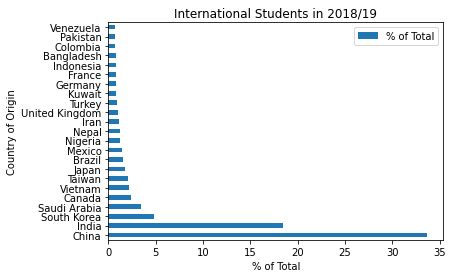

In [0]:
df_is_p.plot(kind='barh')
plt.title('International Students in 2018/19')
plt.xlabel('% of Total')

Text(0.5, 0, '% of Total')

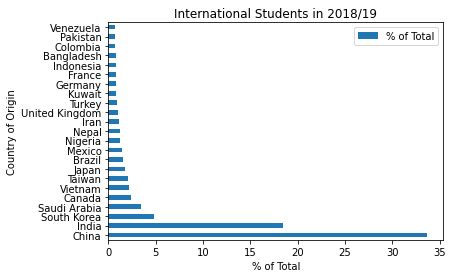

In [0]:
df_is_p.plot(kind='barh')
plt.title('International Students in 2018/19')
plt.xlabel('% of Total')

In [0]:
df_is_18 = df_is[['Country of Origin','2018/19' ]] # passing in years 1980 - 2013 to exclude the 'total' column
df_is_18.head()


,Country of Origin,2018/19
0,China,369548
1,India,202014
2,South Korea,52250
3,Saudi Arabia,37080
4,Canada,26122


Text(0.5, 0, 'Number of Students')

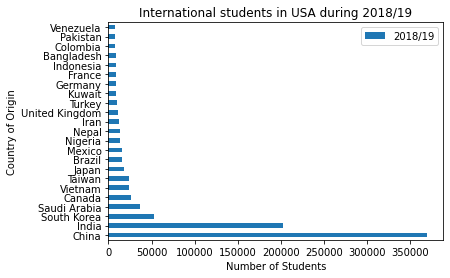

In [0]:
#df_IC.index = df_IC.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_is_18.set_index('Country of Origin', inplace=True)
df_is_18.plot(kind='barh')
plt.title('International students in USA during 2018/19')
#lt.ylabel('Nu')
plt.xlabel('Number of Students')

In [0]:
df_is_17 = df_is[['Country of Origin','2018/19' ]] # passing in years 1980 - 2013 to exclude the 'total' column
df_is_17.head()

,Country of Origin,2018/19
0,China,369548
1,India,202014
2,South Korea,52250
3,Saudi Arabia,37080
4,Canada,26122


Text(0.5, 0, 'Number of Students')

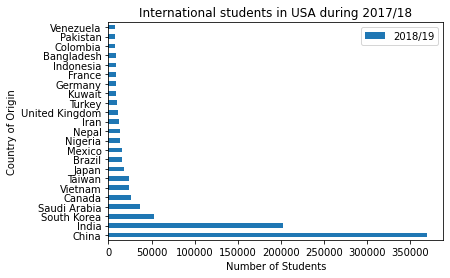

In [0]:
df_is_17.set_index('Country of Origin', inplace=True)
df_is_17.plot(kind='barh')
plt.title('International students in USA during 2017/18')
#lt.ylabel('Nu')
plt.xlabel('Number of Students')

In [0]:
df_is_change = df_is[['Country of Origin','Change' ]] # passing in years 1980 - 2013 to exclude the 'total' column
df_is_change.head()

,Country of Origin,Change
0,China,1.7
1,India,2.9
2,South Korea,-4.2
3,Saudi Arabia,-16.5
4,Canada,0.8


Text(0.5, 0, '% Change ')

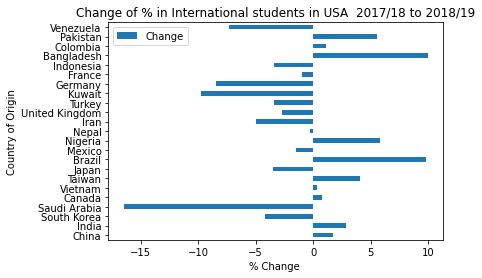

In [0]:
#df_is_change.set_index('Country of Origin', inplace=True)
df_is_change.plot(kind='barh')
plt.title('Change of % in International students in USA  2017/18 to 2018/19')
#lt.ylabel('Nu')
plt.xlabel('% Change ')